In [143]:
import pandas as pd
df = pd.read_csv('data/Customer-Churn-Records.csv')
pd.set_option('display.width', 1000)
df.head()                

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [144]:
# Get an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [145]:
# Drop unnecessary columns
df.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1, inplace=True)
# Convert specified columns to categorical data type
categorical_columns = ['Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Geography']
df[categorical_columns] = df[categorical_columns].astype('category')

df.dtypes

CreditScore              int64
Geography             category
Gender                category
Age                      int64
Tenure                   int64
Balance                float64
NumOfProducts         category
HasCrCard             category
IsActiveMember        category
EstimatedSalary        float64
Exited                category
Complain              category
Satisfaction Score    category
Card Type             category
Point Earned             int64
dtype: object

In [146]:
# Descriptive Statistics
# Select non-numeric columns for analysis
non_numeric_columns = df.select_dtypes(exclude=['number'])

# Display the count of unique values for each non-numeric column
for col in non_numeric_columns:
    print(df[col].value_counts())
    
# Generate descriptive statistics for numeric columns
df.describe()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
Exited
0    7962
1    2038
Name: count, dtype: int64
Complain
0    7956
1    2044
Name: count, dtype: int64
Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


,CreditScore,Age,Tenure,Balance,EstimatedSalary,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881,606.515100
std,96.653299,10.487806,2.892174,62397.405202,57510.492818,225.924839
min,350.000000,18.000000,0.000000,0.000000,11.580000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500,801.000000
max,850.000000,92.000000,10.000000,250898.090000,199992.480000,1000.000000


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(**kwargs)


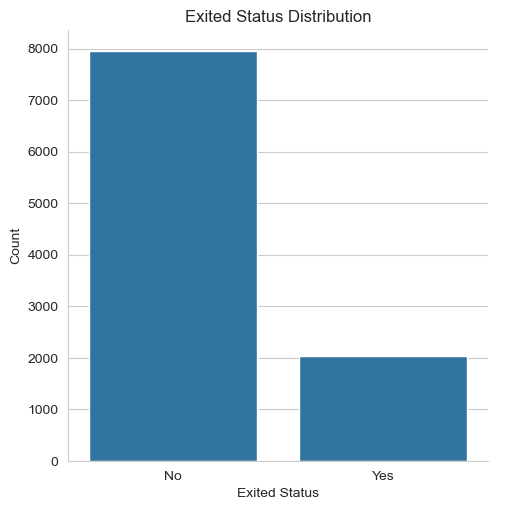

In [147]:
# Visualize distribution of the target variable
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.catplot(x='Exited', data=df, kind='count')
g.set(title='Exited Status Distribution', xlabel='Exited Status', ylabel='Count', xticklabels=['No', 'Yes'])
plt.show()

In [148]:
# Convert specified columns to dummy variables
df = pd.get_dummies(df, columns=['Gender', 'Geography', 'Card Type'], prefix='')
df.dtypes

CreditScore              int64
Age                      int64
Tenure                   int64
Balance                float64
NumOfProducts         category
HasCrCard             category
IsActiveMember        category
EstimatedSalary        float64
Exited                category
Complain              category
Satisfaction Score    category
Point Earned             int64
_Female                   bool
_Male                     bool
_France                   bool
_Germany                  bool
_Spain                    bool
_DIAMOND                  bool
_GOLD                     bool
_PLATINUM                 bool
_SILVER                   bool
dtype: object

In [149]:
# Creating feature and target arrays
# Features are all columns except the 'Exited' column
X = df.drop(['Exited'], axis=1)
# The 'Exited' column is the target variable
y = df['Exited']
print(X.shape, y.shape)

(10000, 20) (10000,)


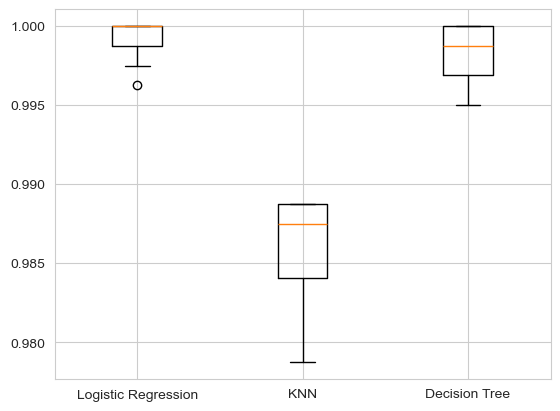

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Split the data into 80% training and 20% testing sets, with stratification based on the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify=y)

# Standardize the feature data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize different models for comparison
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree": DecisionTreeClassifier()}
results = []

# Perform 10-fold cross-validation for each model
for model in models.values():
    kf = KFold(n_splits=10, random_state=20, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)

# Plot boxplots of the cross-validation results for each model    
plt.boxplot(results, tick_labels=models.keys())
plt.show()

The lowest cross-validation score among all models is just below 0.98, and the highest is 1.0. This is unusually high, suggesting that the models are fitting the training data extremely well, potentially indicating overfitting.

In [152]:
# Train and evaluate each model using the testing set
for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    # Print the model name and its accuracy score
    print(name, test_score)

Logistic Regression 0.9965
KNN 0.9875
Decision Tree 0.9955


These accuracy scores are exceptionally high, which is unusual. This may be a sign that the data has characteristics that are too easy for the models to predict, such as a high correlation between certain features.

Let's examine the correlation between the target variable and each feature in the dataset.

In [153]:
# Calculate and display the correlation between each feature and the target variable ('Exited'), excluding the target variable
print(df.corr()['Exited'].drop('Exited').sort_values(ascending=False))

Complain              0.995693
Age                   0.285296
_Germany              0.173313
Balance               0.118577
_Female               0.106267
_DIAMOND              0.020089
EstimatedSalary       0.012490
_PLATINUM            -0.000276
_SILVER              -0.003834
Point Earned         -0.004628
Satisfaction Score   -0.005849
HasCrCard            -0.006976
Tenure               -0.013656
_GOLD                -0.015995
CreditScore          -0.026771
NumOfProducts        -0.047611
_Spain               -0.052800
_France              -0.104688
_Male                -0.106267
IsActiveMember       -0.156356
Name: Exited, dtype: float64


The correlation between the target variable and the 'Complain' column is 0.9956. This value is extremely close to 1 and indicates a very strong relationship. When a customer has a complaint, it almost always results in them exiting.  
The high accuracy of the models is likely due to this near-perfect relationship.  

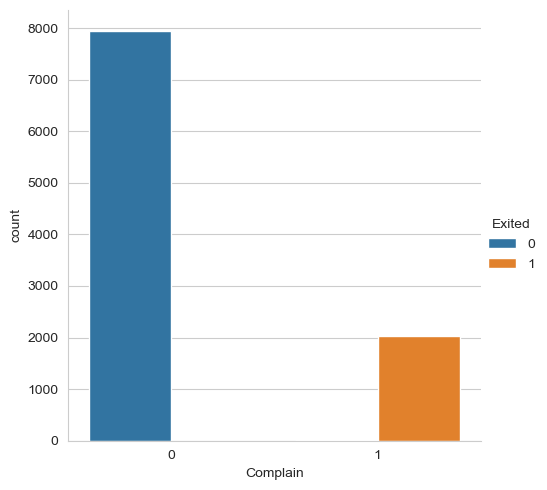

9986


In [154]:
# Visualize the relationship between 'Complain' and 'Exited'.
g = sns.catplot(x='Complain', hue='Exited', data=df, kind='count')
plt.show()

# Count the number of rows where 'Exited' and 'Complain' have matching values
matching_count = (df['Exited'] == df['Complain']).sum()
print(matching_count)

Based on the plot, it appears that the number of customers who exited without a complaint is too small to be clearly visible, as is the case for customers who complained but did not exit.  
There are 9,986 rows out of 10,000 where the values in the 'Exited' and 'Complain' columns match.

Let us remove the 'Complain' column and re-evaluate.

In [155]:
# Creating feature and target arrays
# Create the feature array that includes all columns except the target varible('Exited') and the 'Complain' column.
X = df.drop(['Exited', 'Complain'], axis=1)
# The 'Exited' column is the target variable
y = df['Exited']
print(X.shape, y.shape)

(10000, 19) (10000,)


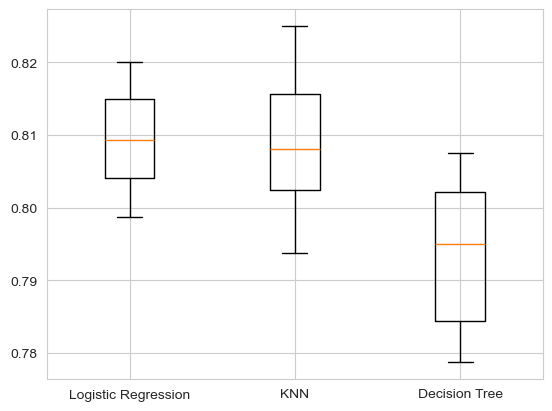

In [156]:
# Train models with the updated feature array and evaluate their performance using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree": DecisionTreeClassifier()}
results = []
for model in models.values():
    kf = KFold(n_splits=10, random_state=20, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)
    
# Plot boxplots of the cross-validation results for each model
plt.boxplot(results, tick_labels=models.keys())
plt.show()

The cross-validation scores now range from 0.77 to 0.83. This is a significant decrease.

In [157]:
for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(name, test_score)

Logistic Regression 0.803
KNN 0.814
Decision Tree 0.79


The accuracy scores are significantly lower but still decent.